In [112]:
#https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
!python -m pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
df = pd.read_csv('data/nba_data.csv')

In [122]:
import re

df.columns = [re.sub(r'\s', '', x) for x in df.columns]

In [123]:
df.SALARY = df.SALARY.apply(lambda x: int(re.sub('\$|,', '', x)))
df.CAP = df.CAP.apply(lambda x: int(re.sub('\$|,', '', x)))

In [124]:
df.head()

,PLAYER,POS,POS2,GP,MPG,FG%,FT%,PTS,RPG,APG,STPG,BLKPG,SALARY,CAP,YEAR
0,A.J. Price,PG,PG,57,22.4,0.390,0.790,7.7,2.0,3.6,0.6,0.1,854389,58679000,2013
1,Aaron Brooks,G,G,53,18.8,0.453,0.769,7.1,1.5,2.2,0.6,0.2,2400000,58679000,2013
2,Aaron Brooks,G,G,72,21.6,0.401,0.874,9.0,1.9,3.2,0.7,0.2,884293,63065000,2014
3,Aaron Brooks,G,G,82,23.0,0.421,0.833,11.6,2.0,3.2,0.7,0.2,915243,70000000,2015
4,Aaron Brooks,G,G,69,16.1,0.401,0.766,7.1,1.5,2.6,0.4,0.1,2250000,94100000,2016


In [125]:
df = pd.get_dummies(df.drop(['PLAYER'], axis=1), prefix=['POS', 'POS_'])

In [127]:
df.head()

,GP,MPG,FG%,FT%,PTS,RPG,APG,STPG,BLKPG,SALARY,...,POS__ PG,POS__ SF,POS__ SG,POS__C,POS__F,POS__G,POS__PF,POS__PG,POS__SF,POS__SG
0,57,22.4,0.390,0.790,7.7,2.0,3.6,0.6,0.1,854389,...,1,0,0,0,0,0,0,0,0,0
1,53,18.8,0.453,0.769,7.1,1.5,2.2,0.6,0.2,2400000,...,0,0,0,0,0,0,0,0,0,0
2,72,21.6,0.401,0.874,9.0,1.9,3.2,0.7,0.2,884293,...,0,0,0,0,0,0,0,0,0,0
3,82,23.0,0.421,0.833,11.6,2.0,3.2,0.7,0.2,915243,...,0,0,0,0,0,0,0,0,0,0
4,69,16.1,0.401,0.766,7.1,1.5,2.6,0.4,0.1,2250000,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df[[x for x in df.columns if '_' not in x]].corr()

,GP,MPG,FG%,FT%,PTS,RPG,APG,STPG,BLKPG,SALARY,CAP,YEAR
GP,1.000000,0.575759,0.196377,0.237215,0.432783,0.377210,0.286834,0.401237,0.224925,0.158880,-0.111551,-0.140037
MPG,0.575759,1.000000,0.137116,0.264699,0.871794,0.610925,0.662466,0.733391,0.329596,0.516368,0.033169,0.027986
FG%,0.196377,0.137116,1.000000,-0.015220,0.171422,0.381945,-0.027580,0.037469,0.386350,0.124655,0.127879,0.111753
FT%,0.237215,0.264699,-0.015220,1.000000,0.275779,0.016685,0.216139,0.184426,-0.065344,0.112681,0.099253,0.099666
PTS,0.432783,0.871794,0.171422,0.275779,1.000000,0.561791,0.675914,0.633801,0.287761,0.594105,0.098340,0.096553
RPG,0.377210,0.610925,0.381945,0.016685,0.561791,1.000000,0.230713,0.369888,0.689913,0.438095,0.056397,0.051845
APG,0.286834,0.662466,-0.027580,0.216139,0.675914,0.230713,1.000000,0.672189,-0.020382,0.452956,0.064668,0.066811
STPG,0.401237,0.733391,0.037469,0.184426,0.633801,0.369888,0.672189,1.000000,0.170923,0.366731,0.021612,0.015630
BLKPG,0.224925,0.329596,0.386350,-0.065344,0.287761,0.689913,-0.020382,0.170923,1.000000,0.237802,0.019970,0.015072
SALARY,0.158880,0.516368,0.124655,0.112681,0.594105,0.438095,0.452956,0.366731,0.237802,1.000000,0.206540,0.205577


In [129]:
samp = df.dropna()
X = samp.drop(['SALARY', 'YEAR', 'MPG'], axis=1) # year and cap, and mpg and pts, are highly correlated
y = samp.SALARY

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y, X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     123.7
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:55:57   Log-Likelihood:                -62392.
No. Observations:                3685   AIC:                         1.248e+05
Df Residuals:                    3662   BIC:                         1.250e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.257e+06   7.92e+05     -1.587      0.113   -2.81e+06    2.96e+05
GP         -3.447e+04   5083.871     -6.780      0.000   -4.44e+04   -2.45e+04
FG%        -2.733e+06   1.17e+06     -2.340      0.019   -5.02e+06   -4.43e+05
FT%        -8.762e+05   6.53e+05     -1.341      0.180   -2.16e+06    4.05e+05
PTS         5.246e+05   2.73e+04     19.249      0.000    4.71e+05    5.78e+05
RPG         4.208e+05   7.01e+04      6.002      0.000    2.83e+05    5.58e+05
APG         9.802e+05   9.21e+04     10.638      0.000       8e+05    1.16e+06
STPG       -8.692e+05   3.32e+05     -2.619      0.009   -1.52e+06   -2.18e+05
BLKPG       -5.96e+04    3.1e+05     -0.192      0.848   -6.68e+05    5.49e+05
CAP            0.0351      0.007      4.827      0.000       0.021       0.049
POS_C       9.345e+05   2.63e+05      3.547      0.000    4.18e+05    1.45e+06
POS_F      -5.019e+05   8.25e+05     -0.608      0.543   -2.12e+06    1.12e+06
POS_G      -1.483e+06    7.5e+05     -1.977      0.048   -2.95e+06   -1.24e+04
POS_PF      5.855e+05   2.29e+05      2.551      0.011    1.36e+05    1.04e+06
POS_PG     -1.015e+06   2.61e+05     -3.893      0.000   -1.53e+06   -5.04e+05
POS_SF      4.795e+05   2.29e+05      2.091      0.037    2.98e+04    9.29e+05
POS_SG     -2.567e+05   2.31e+05     -1.110      0.267    -7.1e+05    1.97e+05
POS__ C     8.766e+04   2.44e+05      0.360      0.719    -3.9e+05    5.65e+05
POS__ F     1.308e+06   9.98e+05      1.311      0.190   -6.48e+05    3.26e+06
POS__ G      6.35e+05   9.03e+05      0.703      0.482   -1.14e+06    2.41e+06
POS__ PF   -1.639e+05   2.57e+05     -0.637      0.524   -6.68e+05     3.4e+05
POS__ PG   -1.226e+06    2.8e+05     -4.378      0.000   -1.77e+06   -6.77e+05
POS__ SF    4.805e+04   2.78e+05      0.173      0.863   -4.98e+05    5.94e+05
POS__ SG    -3.26e+05    2.7e+05     -1.208      0.227   -8.55e+05    2.03e+05
POS__C      8.469e+05   2.94e+05      2.881      0.004     2.7e+05    1.42e+06
POS__F      -1.81e+06   1.78e+06     -1.014      0.310   -5.31e+06    1.69e+06
POS__G     -2.118e+06   1.61e+06     -1.318      0.188   -5.27e+06    1.03e+06
POS__PF     7.494e+05   2.87e+05      2.609      0.009    1.86e+05    1.31e+06
POS__PG     2.103e+05   3.04e+05      0.693      0.489   -3.85e+05    8.05e+05
POS__SF     4.314e+05   3.03e+05      1.422      0.155   -1.63e+05    1.03e+06
POS__SG     6.926e+04   2.86e+05      0.242      0.809   -4.92e+05    6.31e+05
==============================================================================
Omnibus:                      624.657   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1708.369
Skew:                           0.907   Prob(JB):                         0.00
Kurtosis:                       5.800   Cond. No.                     8.47e+18
==

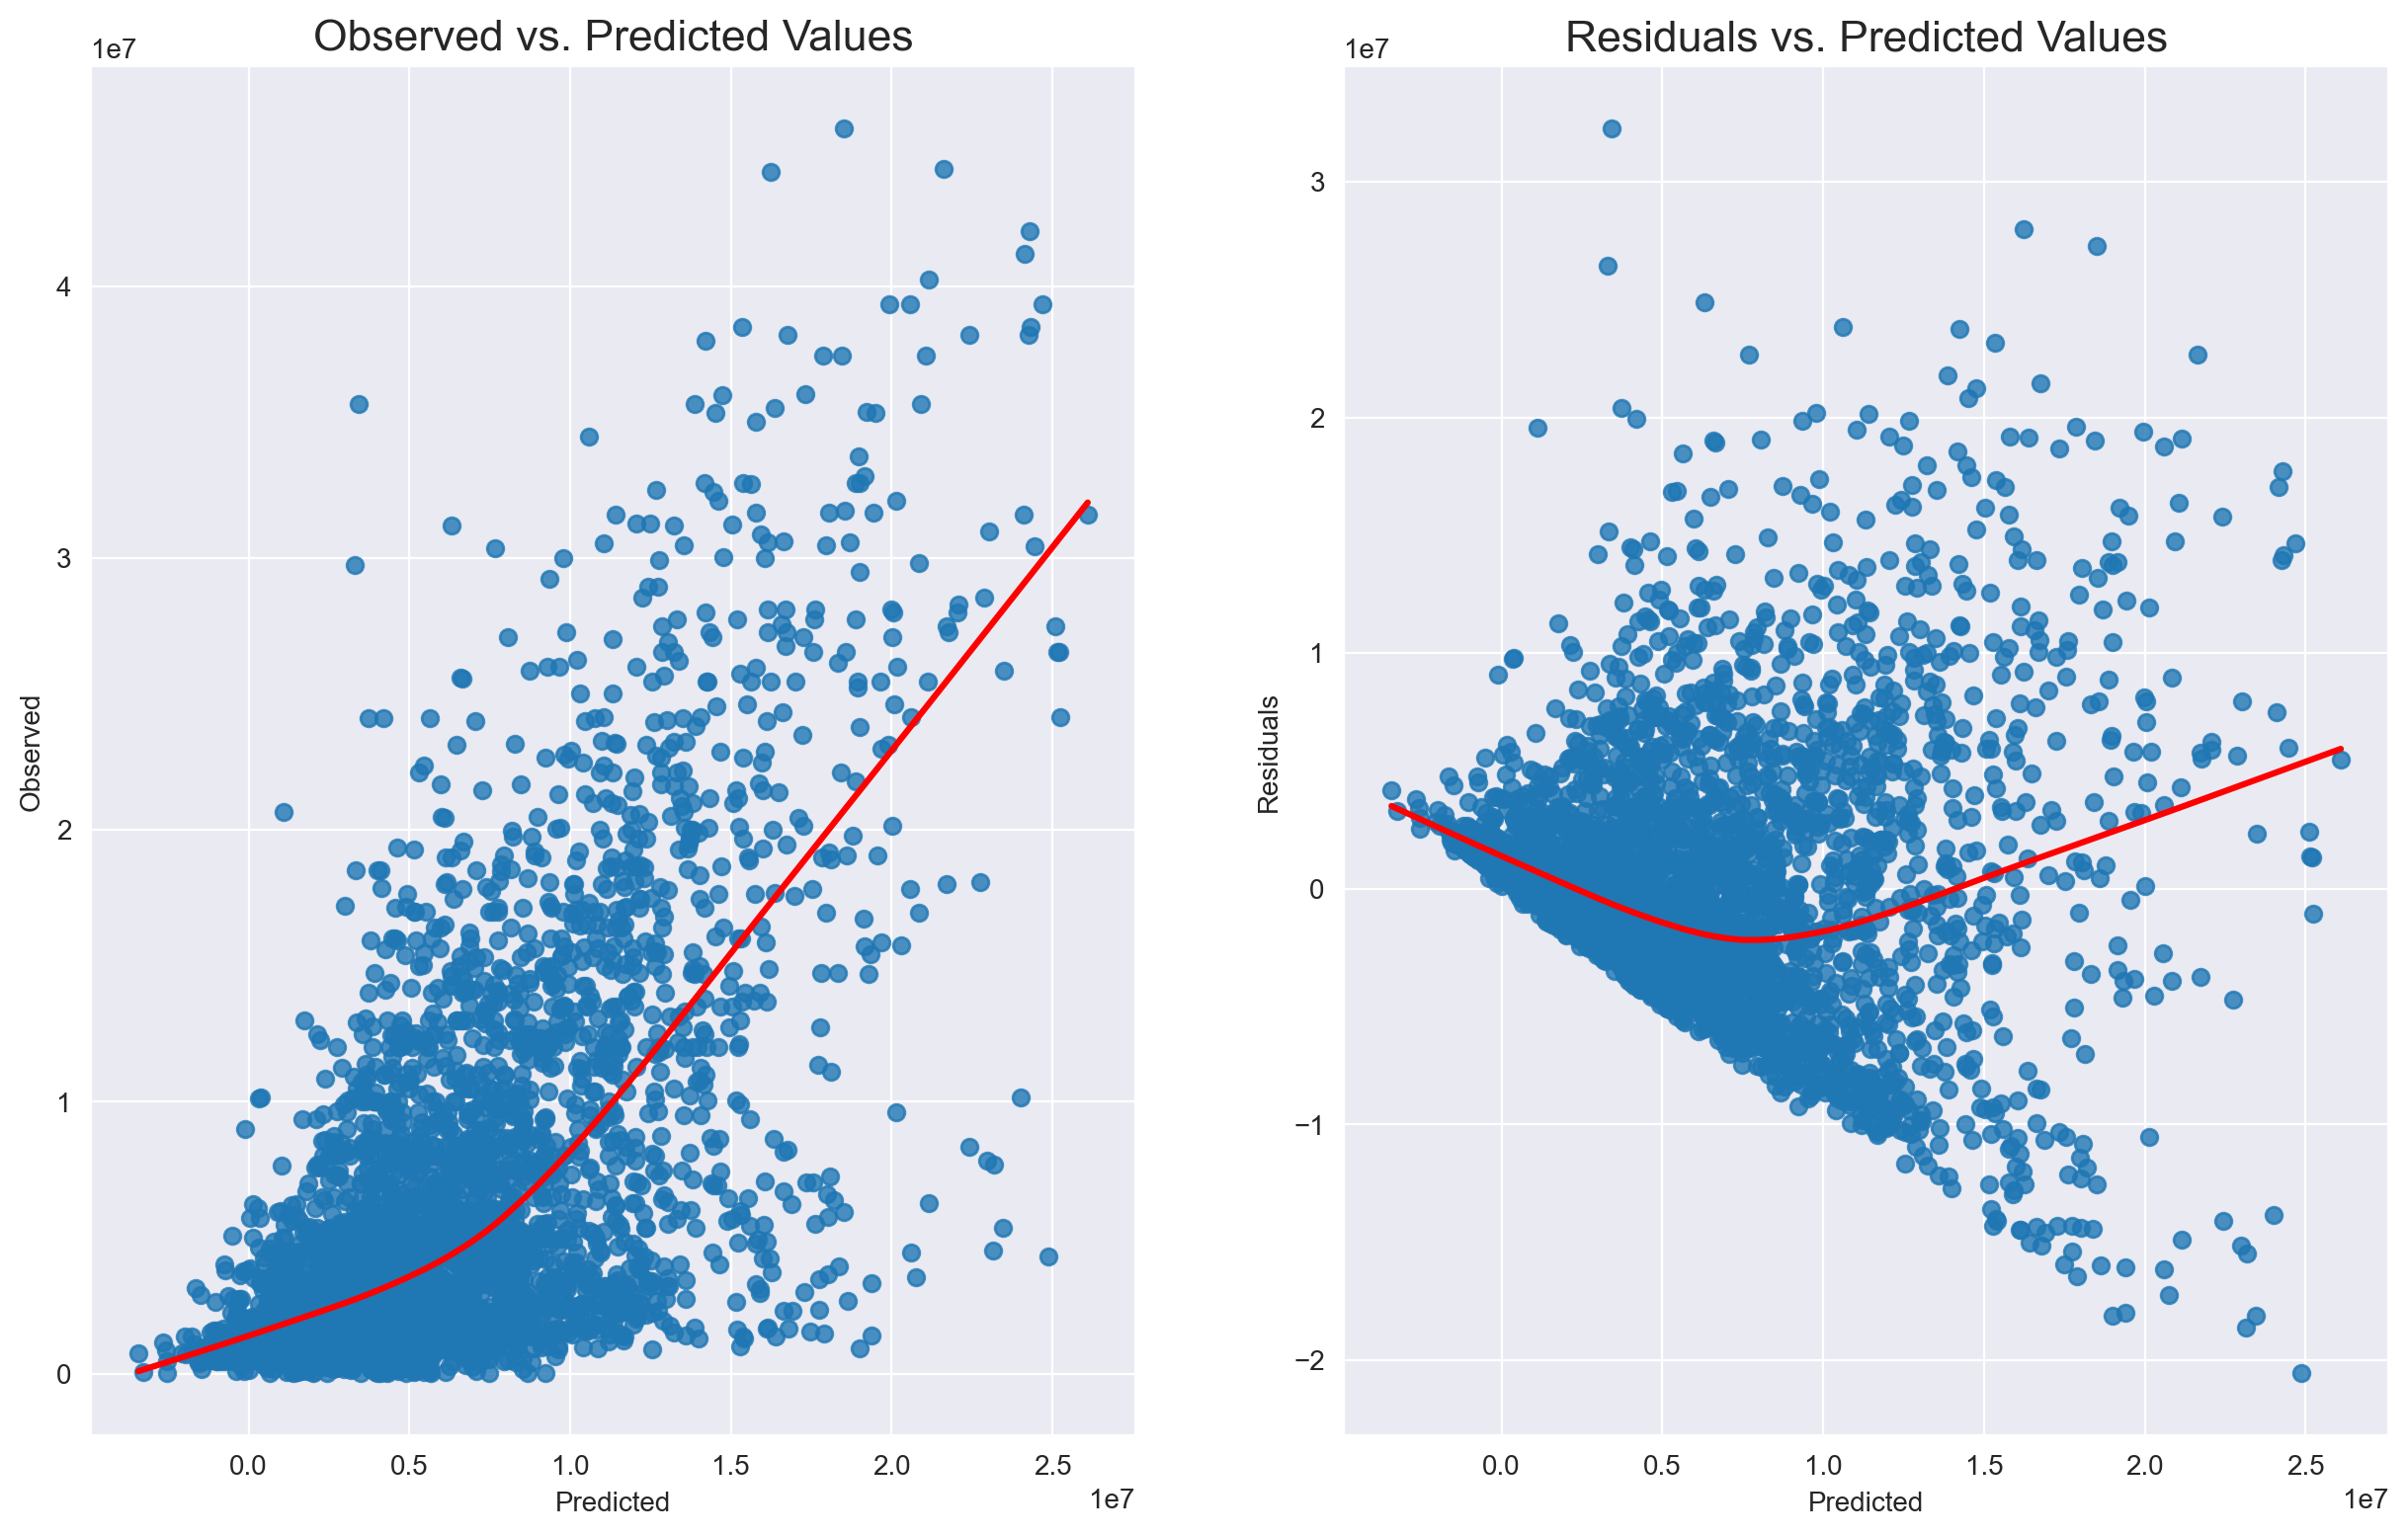

In [130]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y) 

In [131]:
# expected mean of residuals is zero
lin_reg.resid.mean()

0.001293561513582434

In [143]:
# no perfect multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_c = X_constant[[x for x in X_constant.columns if '_' not in x]]

vif = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
pd.DataFrame({'vif': vif}, index=X_c.columns).T

,const,GP,FG%,FT%,PTS,RPG,APG,STPG,BLKPG,CAP
vif,66.708988,1.42454,1.267964,1.168847,3.04782,2.804002,2.5548,2.184692,2.111314,1.076574


In [155]:
pd.options.display.float_format = '{:.2f}'.format


 Breusch-Pagan test ----
                               value
Lagrange multiplier statistic 850.08
p-value                         0.00
f-value                        49.91
f p-value                       0.00

 Goldfeld-Quandt test ----
             value
F statistic   1.06
p-value       0.09

 Residuals plots ----


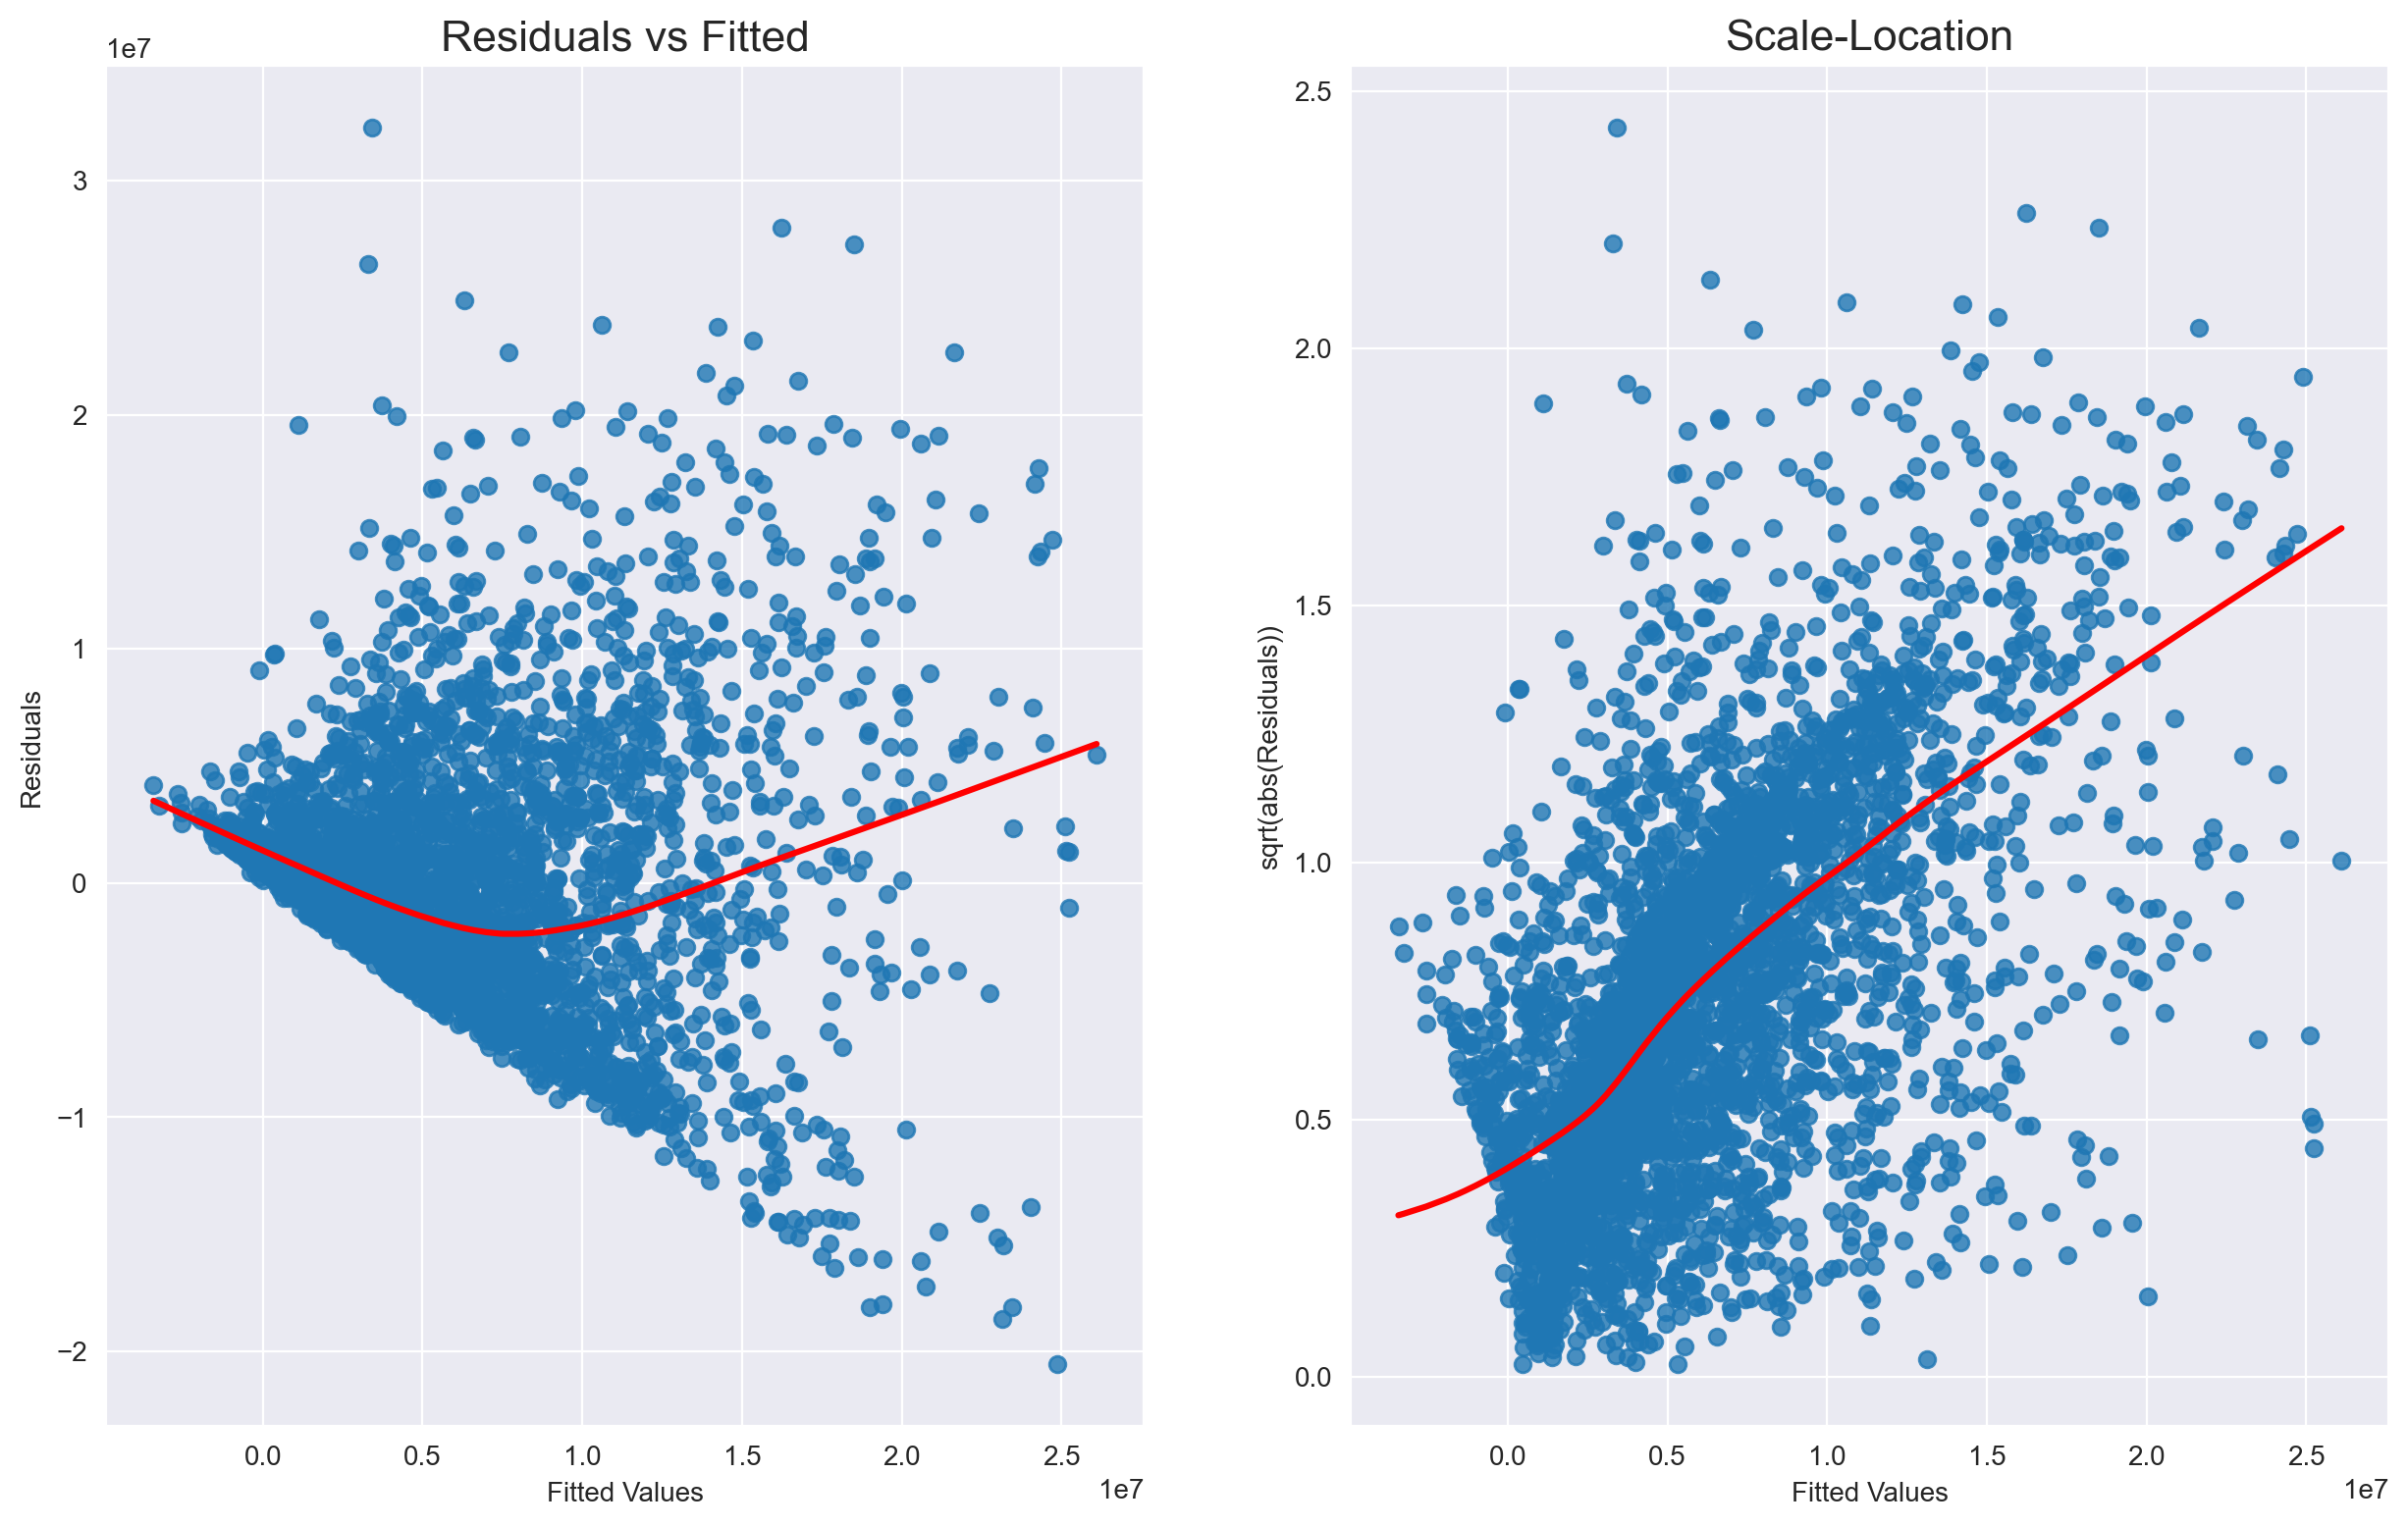

In [156]:
# Homoscedasticity (equal variance) of residuals

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16636\2717689904.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


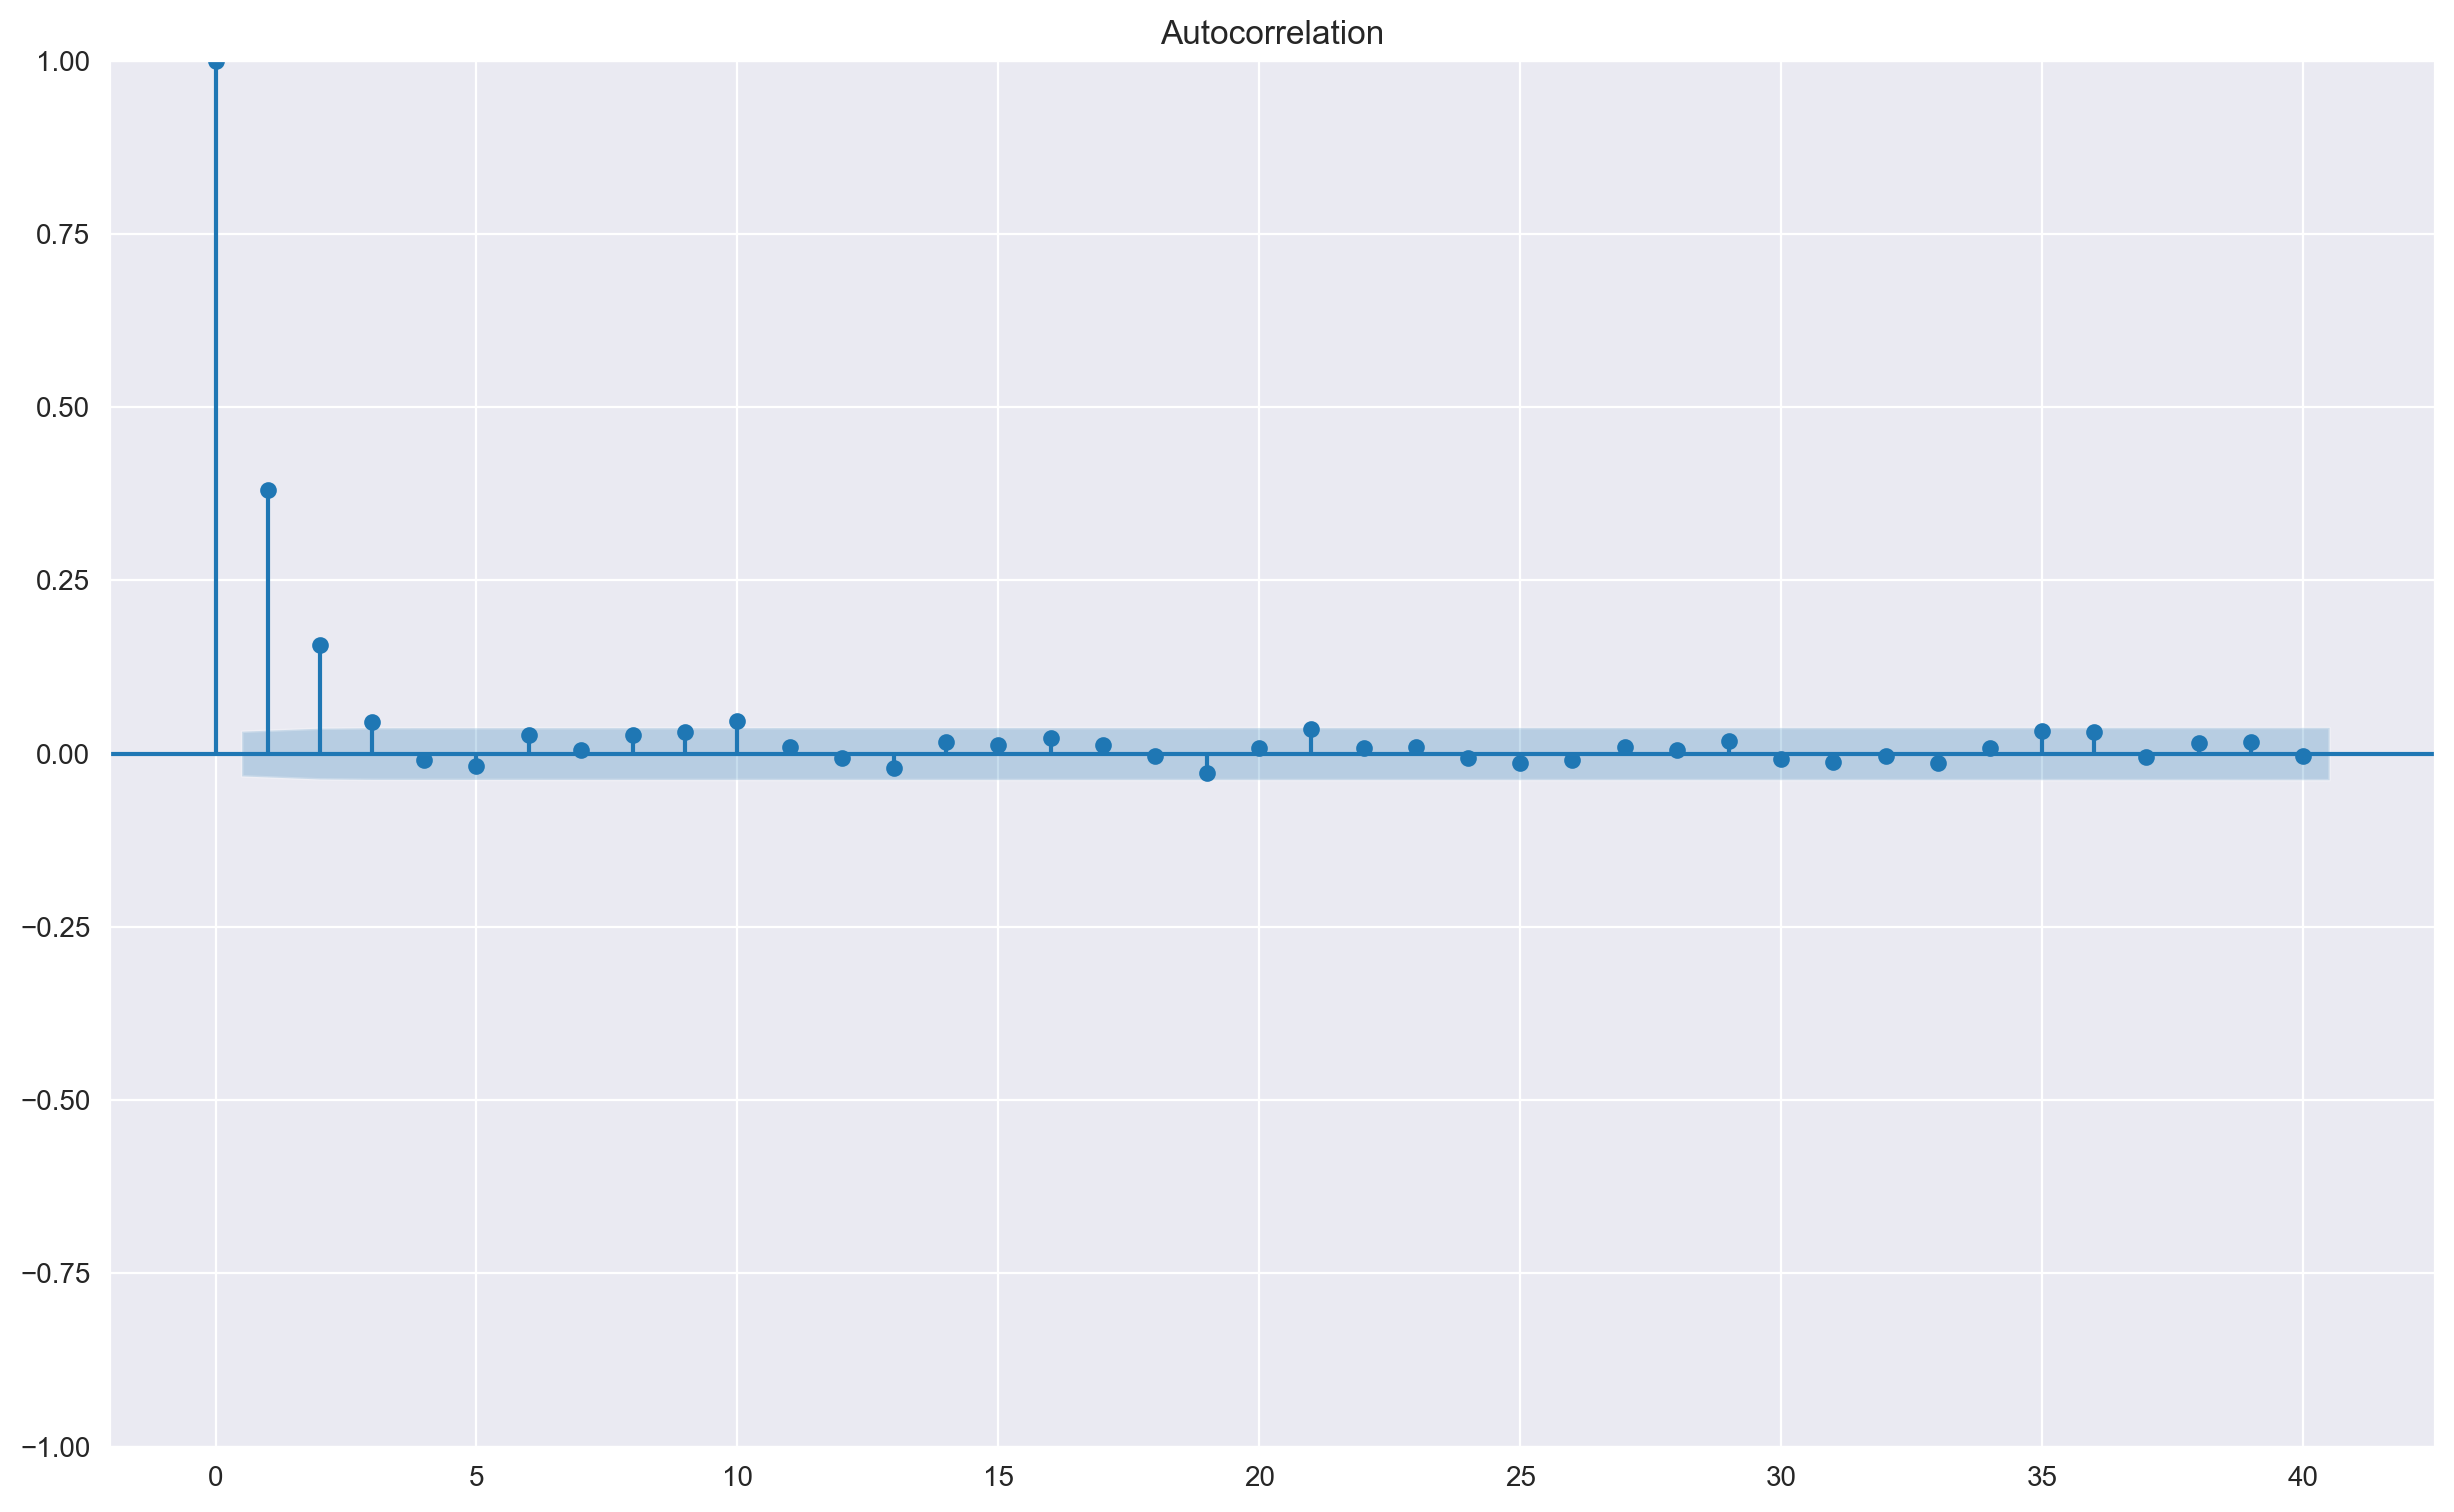

In [158]:
# no autocorrelation of residuals (Durbin-Watson)

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

In [159]:
# features and residuals are uncorrelated
# cannot reject the null hypothesis (lack of correlation) for any pair.



from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')


Variable: GP --- correlation: -0.0000, p-value: 1.0000
Variable: FG% --- correlation: 0.0000, p-value: 1.0000
Variable: FT% --- correlation: -0.0000, p-value: 1.0000
Variable: PTS --- correlation: 0.0000, p-value: 1.0000
Variable: RPG --- correlation: 0.0000, p-value: 1.0000
Variable: APG --- correlation: 0.0000, p-value: 1.0000
Variable: STPG --- correlation: -0.0000, p-value: 1.0000
Variable: BLKPG --- correlation: 0.0000, p-value: 1.0000
Variable: CAP --- correlation: 0.0000, p-value: 1.0000
Variable: POS_C --- correlation: 0.0000, p-value: 1.0000
Variable: POS_F --- correlation: 0.0000, p-value: 1.0000
Variable: POS_G --- correlation: -0.0000, p-value: 1.0000
Variable: POS_PF --- correlation: 0.0000, p-value: 1.0000
Variable: POS_PG --- correlation: -0.0000, p-value: 1.0000
Variable: POS_SF --- correlation: 0.0000, p-value: 1.0000
Variable: POS_SG --- correlation: 0.0000, p-value: 1.0000
Variable: POS__ C --- correlation: -0.0000, p-value: 1.0000
Variable: POS__ F --- correlation: 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16636\3244408021.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [160]:
# There must be some variability in features
# not vary much variance

X.apply(np.var, axis=0)

GP                     477.12
FG%                      0.01
FT%                      0.02
PTS                     36.10
RPG                      6.06
APG                      3.47
STPG                     0.18
BLKPG                    0.19
CAP        407580878690477.12
POS_C                    0.16
POS_F                    0.07
POS_G                    0.07
POS_PF                   0.15
POS_PG                   0.13
POS_SF                   0.13
POS_SG                   0.14
POS__ C                  0.10
POS__ F                  0.07
POS__ G                  0.07
POS__ PF                 0.08
POS__ PG                 0.07
POS__ SF                 0.06
POS__ SG                 0.07
POS__C                   0.08
POS__F                   0.00
POS__G                   0.00
POS__PF                  0.08
POS__PG                  0.07
POS__SF                  0.07
POS__SG                  0.09
dtype: float64

Jarque-Bera test ---- statistic: 1708.3690, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9424, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5674, p-value: 0.0000
Anderson-Darling test ---- statistic: 59.9988, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


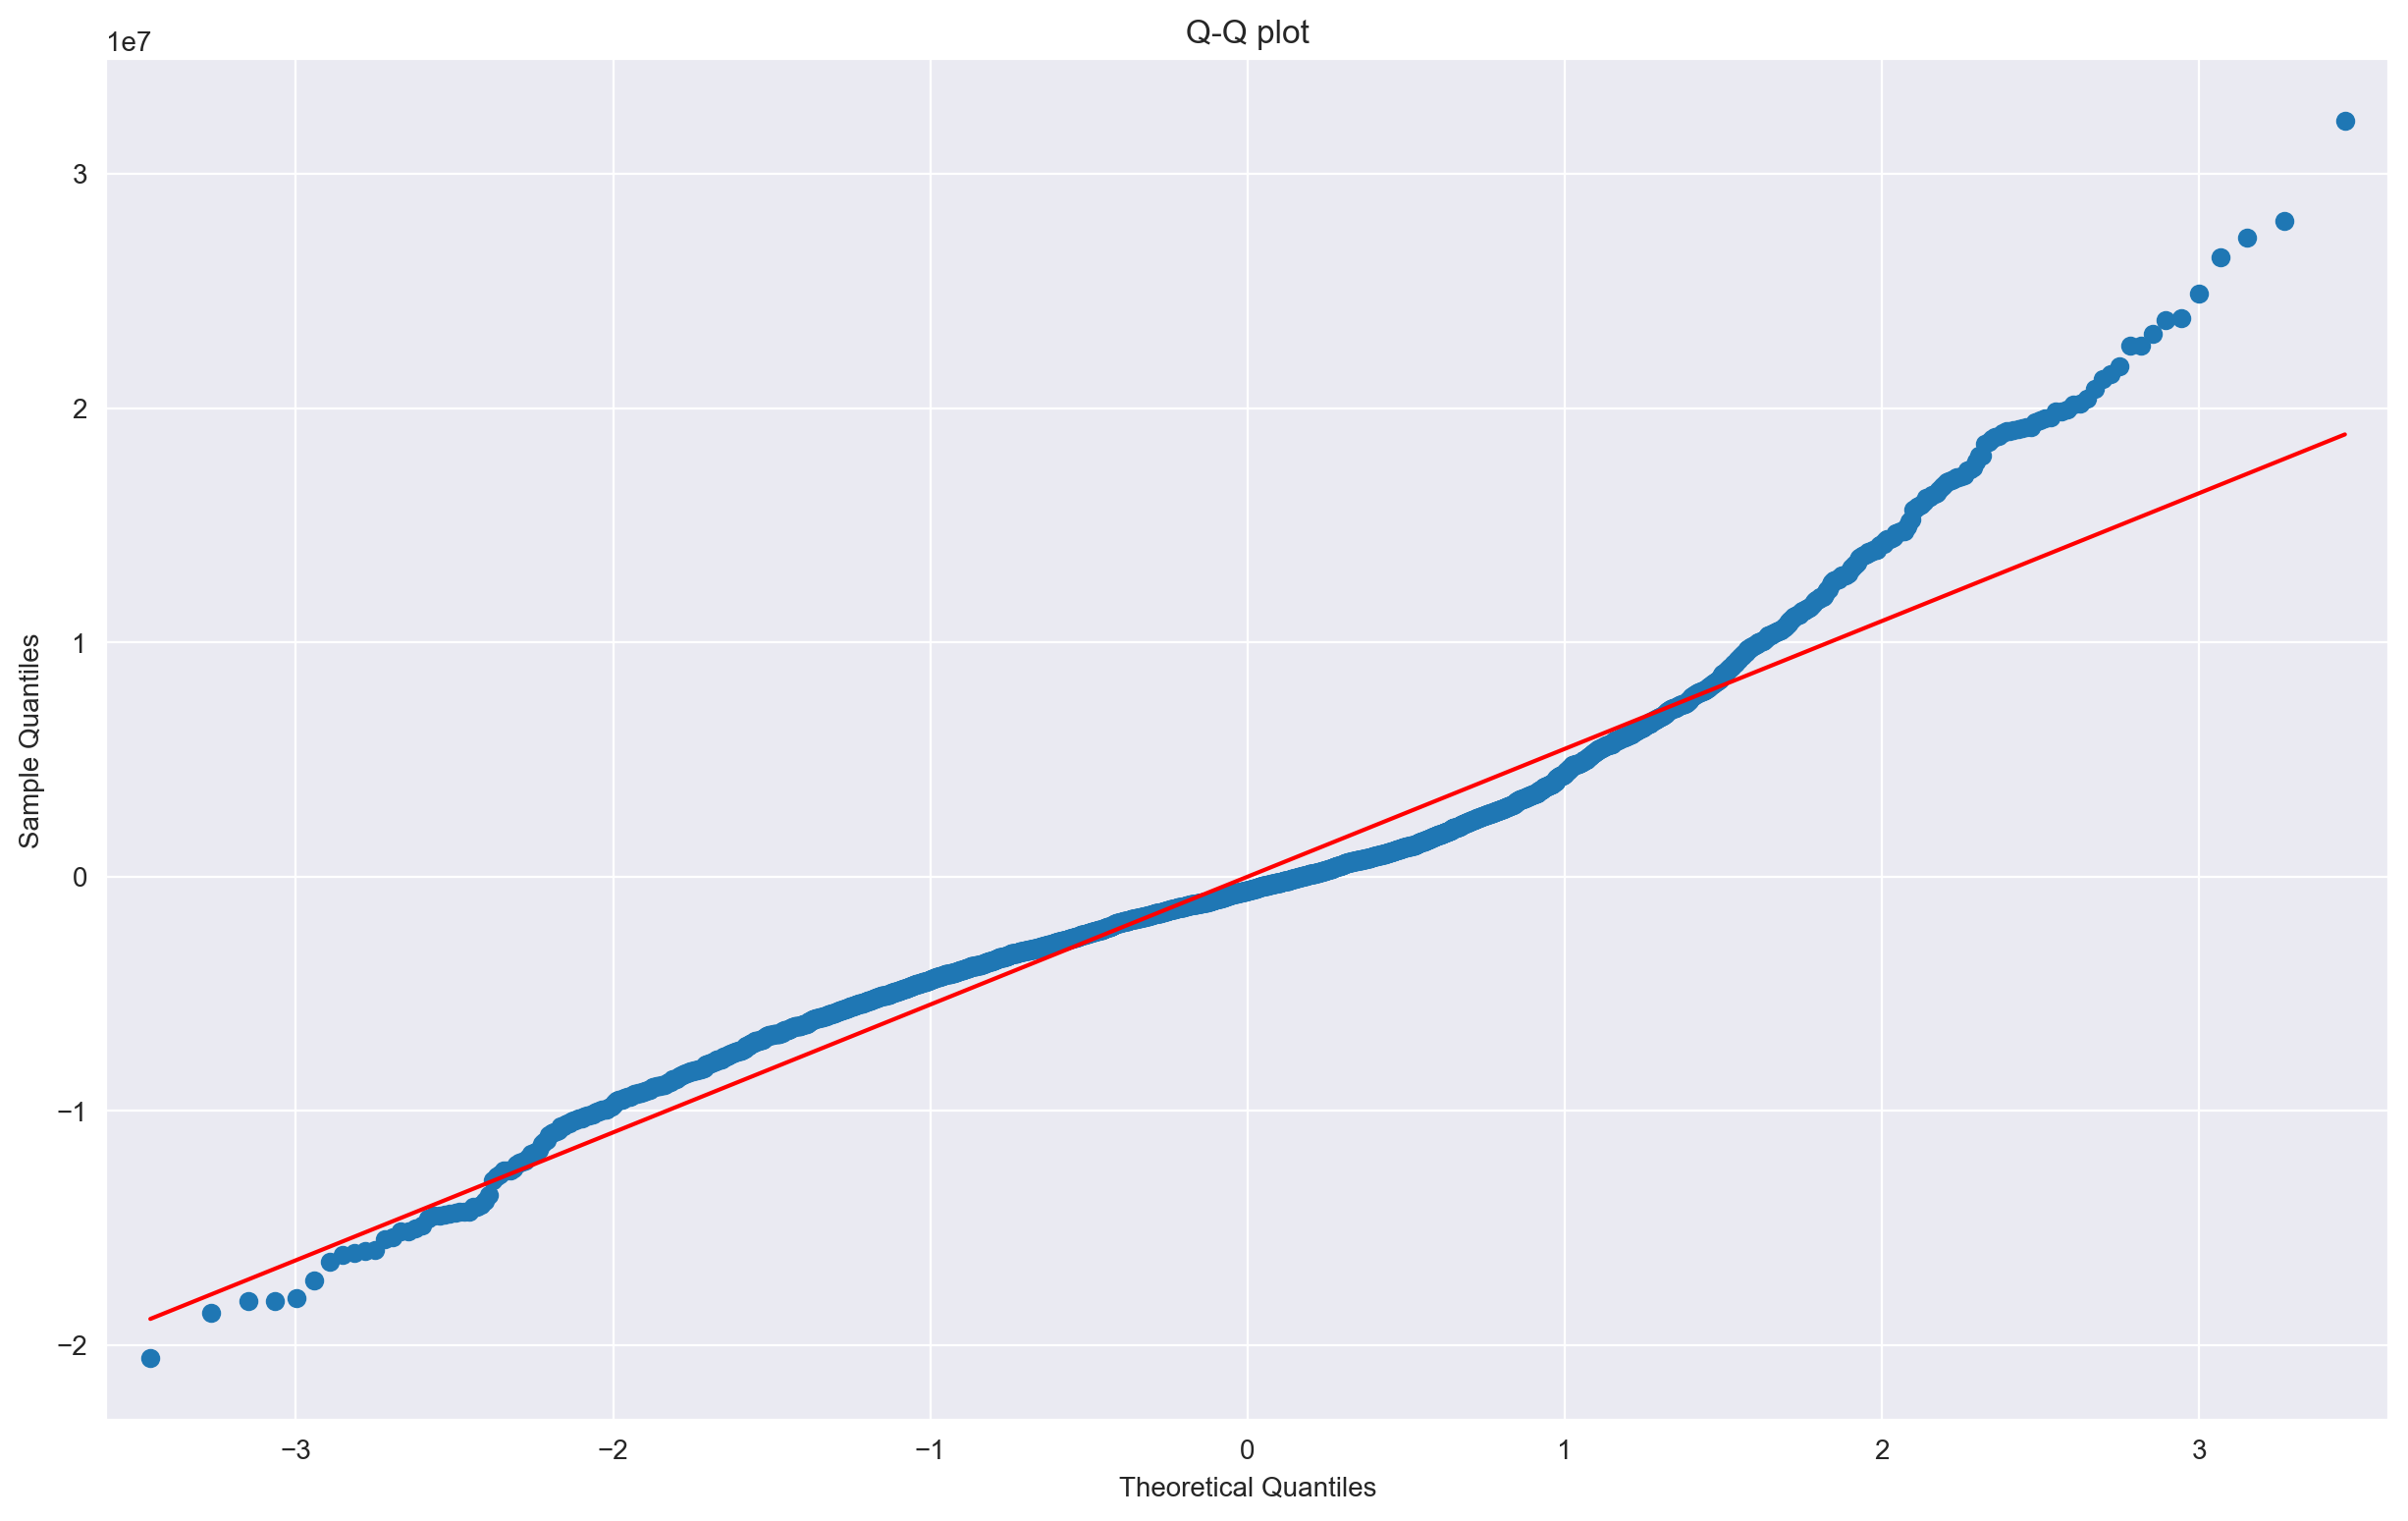

In [162]:
# normality of residuals


from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)